<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

## <center> Assignment 4 (demo)
### <center>  Sarcasm detection with logistic regression
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) + [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).**


We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [87]:
!dir ..\..\data\sarcasm\

 Volume in drive C is EPUAKYIW00D2
 Volume Serial Number is 9C7C-BB8F

 Directory of C:\Users\Ihor_Bulaievskyi\Documents\projects\mlcourse.ai\data\sarcasm

10/31/2020  05:20 PM    <DIR>          .
10/31/2020  05:20 PM    <DIR>          ..
10/31/2020  05:18 PM           923,188 test-balanced.csv
12/17/2019  11:30 PM        17,434,728 test-unbalanced.csv
05/24/2017  12:22 PM       245,954,390 train-balanced-sarc.csv
12/17/2019  11:30 PM       255,268,960 train-balanced-sarcasm.csv
               4 File(s)    519,581,266 bytes
               2 Dir(s)  77,730,988,032 bytes free


In [88]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings('ignore')

In [89]:
train_df = pd.read_csv('../../data/sarcasm/train-balanced-sarcasm.csv')

In [90]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


Some comments are missing, so we drop the corresponding rows.

In [92]:
train_df.dropna(subset=['comment'], inplace=True)

We notice that the dataset is indeed balanced

In [93]:
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [94]:
texts_train, texts_test, y_train, y_test = \
        train_test_split(train_df['comment'], train_df['label'], random_state=17)

## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

## Plots:
1. Words cloud for sarcastic and non sarcastic comments

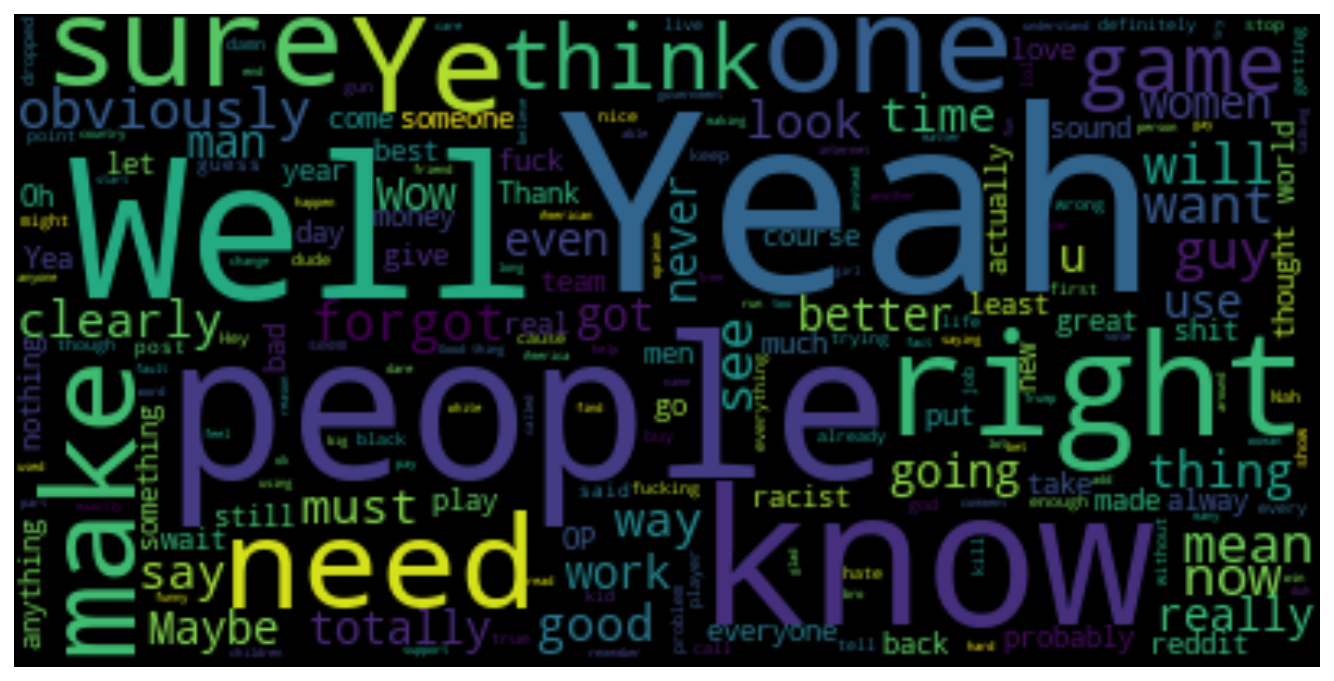

In [95]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sarcastic_index = train_df['label'] == 1
wordcloud = WordCloud().generate(' '.join(train_df[sarcastic_index]['comment']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

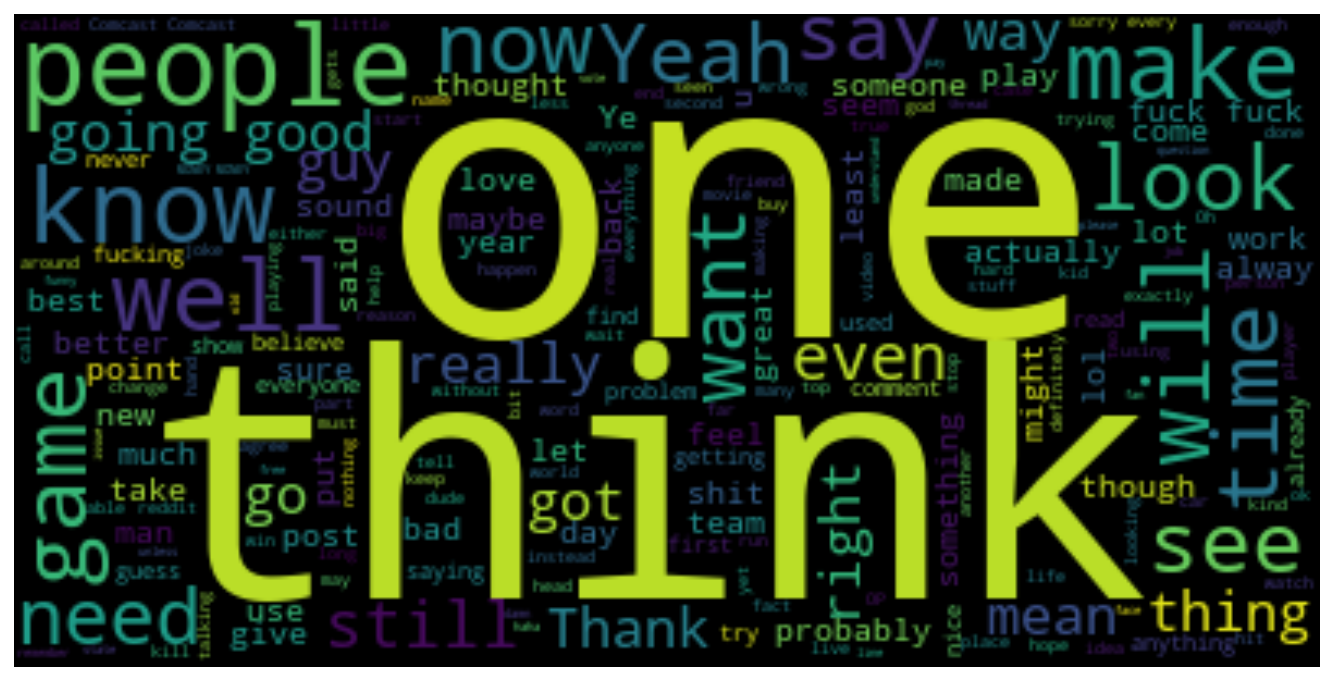

In [96]:
wordcloud = WordCloud().generate(' '.join(train_df[~sarcastic_index]['comment']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

2. Boxplots of comment length and words count

Text(0.5, 1.0, 'Comment length')

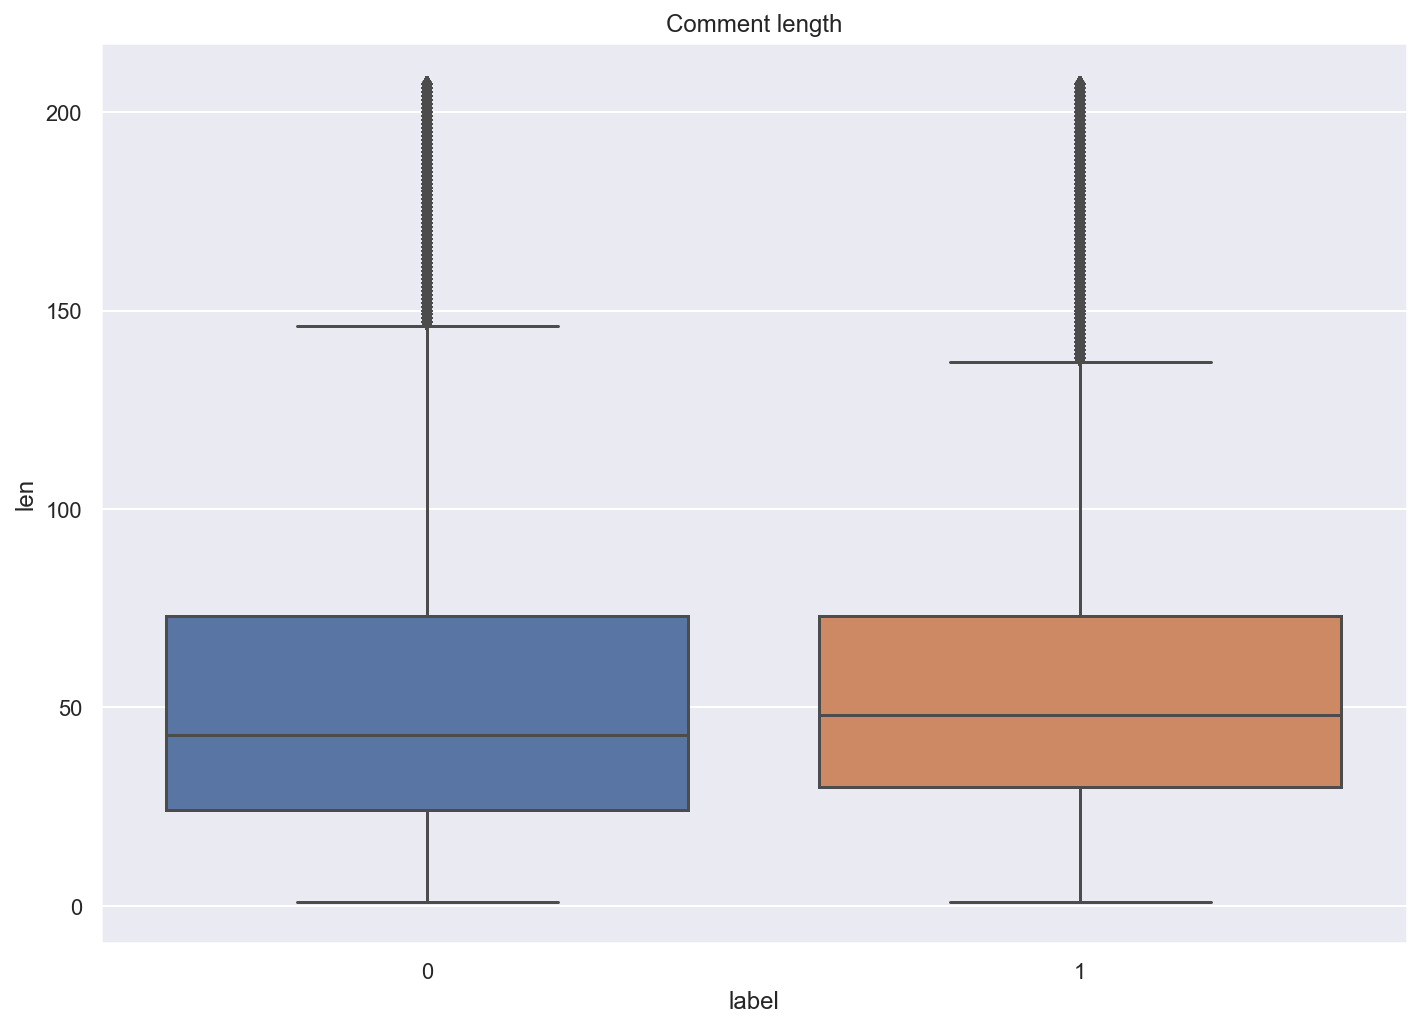

In [97]:
train_df['len'] = train_df['comment'].str.len()
filtered_to_long_df = train_df[train_df['len'] <= train_df['len'].quantile(0.99)]
sns.boxplot(x='label', y='len', data=filtered_to_long_df).set_title('Comment length')

Text(0.5, 1.0, 'Words in comment')

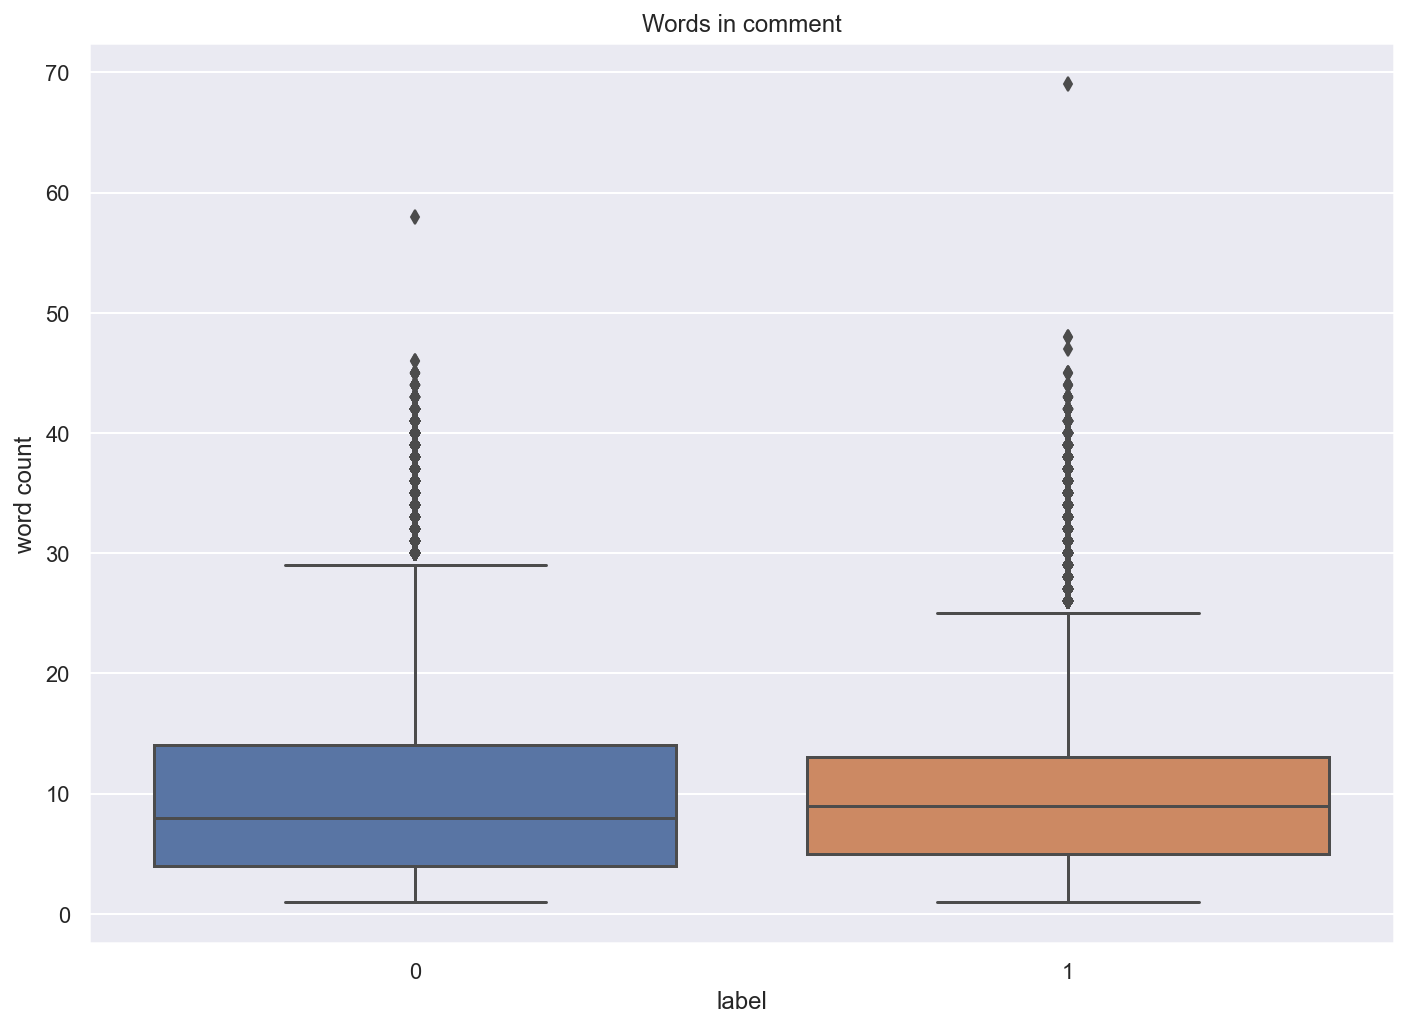

In [98]:
filtered_to_long_df['word count'] = filtered_to_long_df['comment'].str.split().apply(len)
sns.boxplot(x='label', y='word count', data=filtered_to_long_df).set_title('Words in comment')

## Tf-Idf + logistic regression pipeline

In [99]:
# convert comments text to TF-IDF features
text_transformer = TfidfVectorizer(ngram_range=(1, 2),
                                   lowercase=True,
                                   max_features=150000)
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial',
                           random_state=17, n_jobs=8)
pipeline = Pipeline([('tfid', text_transformer),
                     ('logit', logit)])

In [100]:
%%time
pipeline.fit(texts_train, y_train)

Wall time: 55.8 s


Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_features=150000, ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=8,
                                    random_state=17))])

In [101]:
# count accuracy score
y_pred = pipeline.predict(texts_test)
accuracy_score(y_test, y_pred)

0.7016787102186834

## Most predictive words/bigrams

In [102]:
import eli5

eli5.show_weights(estimator=pipeline, 
                  feature_names= list(text_transformer.get_feature_names()),
                  top=(50, 5))

Weight?,Feature
+7.567,yes sure
+7.504,couldn possibly
+7.392,imagine why
+7.283,no dude
+6.906,yes because
+6.765,think needed
+6.639,yeah because
+6.635,yeah why
+6.441,yeah being
+6.308,right because


## Adding subreddit feature

In [107]:
# separate transformers for subreddit and text
text_transformer = TfidfVectorizer(ngram_range=(1, 2),
                                   lowercase=True,
                                   max_features=150000)

texts_train = text_transformer.fit_transform(texts_train)
texts_test = text_transformer.transform(texts_test)

In [108]:
subreddit_train, subreddit_test = train_test_split(train_df['subreddit'], random_state=17)

subredit_transformer = TfidfVectorizer(ngram_range=(1, 1))
subreddit_train = text_transformer.fit_transform(subreddit_train)
subreddit_test = text_transformer.transform(subreddit_test)

In [118]:
from scipy import sparse

# concatenate matrixes (I looked at the solution :)
x_train = sparse.hstack([texts_train, subreddit_train])
x_test = sparse.hstack([texts_test, subreddit_test])

In [119]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial',
                           random_state=17, n_jobs=8)
logit.fit(x_train, y_train)

LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=8, random_state=17)

In [120]:
y_pred = logit.predict(x_test)
accuracy_score(y_test, y_pred)

0.7235866304700547

Accuracy score increased!